In [25]:
#################################
###### 1. Data Preparation ######
#################################

# https://www.kaggle.com/loveall/cervical-cancer-risk-classification
# https://ieeexplore.ieee.org/document/
# NOTE: CHANGE ? to NA so that it can then compute mean and std for numeric cols

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
df.shape

(858, 36)

Data examination:

In [26]:
######### column names #########
# print(df.columns)
    # note: CIN - Cervical Intraepithelial Neoplasia
    # note: Dx - Medical Abbreviation for Diagnosis

######### other data descriptors #########
# print(df.head(5))
# df.describe
# df.info()

######### how many unique values per feature? #########
# for col in df.columns:
#     print(col,": ")
#     print(np.unique(df[col],return_counts=True))
######### object type in each col: #########
# for col in df.columns:
    # print(df[col].dtype) # objects = string (meaning that because there's at least one string in that col, whole col treated
        # as string, even if most of the other rows in that col are actually int!)
    
######### how many unknowns per feature? #########
# for col in df.columns:
#     print(f'{col} : {len(df[df[col]=="?"])}')

######### mean and sd for each feature (ie column) #########
# df.mean()
# df.std()

From Kaggle notebook (https://www.kaggle.com/atakansoztekin/cancer-data-analysis-and-model-implementation):

In [27]:
# replace "?" with na (easier to handle subsequently)
df = df.replace("?", np.nan)
# convert to float
df = df.astype(float)
# how many null values per feature?
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [28]:
# remove features with too many null values
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
# print(df.columns)
print(df.shape) # should have 2 features less

(858, 34)


In [29]:
######### Inferring missing data #########

# Strategy 1: KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=600)
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
# df.isnull().sum()

# Strategy 2: replace na values with median of that feature
    # (not mean, since mean more vulnerable to outliers)
# for col in df.columns:
#     df[col].fillna(df[col].median(), inplace = True)
# df.isnull().sum()

In [30]:
print(df.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [31]:
######### Feature selection: smoking #########
# how many cigarettes has this person smoked in their life?
df['Smokes'] = df['Smokes (years)']*df['Smokes (packs/year)']
# remove redundant columns
df = df.drop(['Smokes (years)','Smokes (packs/year)'], axis=1)
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.00,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.00,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.55,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.00,4.000000,1369.000000,1.0,3.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.00,4.000000,0.000000,1.0,15.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.00,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51.0,3.0,17.00,6.000000,115.600000,0.0,0.0,1.000000,7.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,26.0,1.0,26.00,3.000000,0.000000,1.0,2.0,1.000000,7.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,45.0,1.0,20.00,5.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,44.0,3.0,15.00,2.473333,3.547524,0.0,0.0,0.131667,0.604117,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
######### Feature selection: contraceptives #########
# remove redundant columns
df = df.drop(['IUD','Hormonal Contraceptives','STDs'], axis=1)

In [33]:
###### bootstrap example ######

# from sklearn.utils import resample
# df2 = resample(df[df['Biopsy']==1],n_samples=50,replace=True)
# df = df.append(df2)
# print(np.unique(df['Biopsy'],return_counts=True))
# df.mean()

In [34]:
###### same proportion of each class in train and test sets ######

df_biopsy_1 = df[df['Biopsy']==1]
df_biopsy_0 = df[df['Biopsy']==0]

In [35]:
train_0 = df_biopsy_0.iloc[0:642,:]
train_1 = df_biopsy_1.iloc[0:44,:]

test_0 = df_biopsy_0.iloc[642:len(df_biopsy_0),:]
test_1 = df_biopsy_1.iloc[44:len(df_biopsy_1),:]

train = train_0.append(train_1)
test = test_0.append(test_1)

In [36]:
# randomly reshuffle the rows
train = train.sample(frac = 1).reset_index(drop=True)
test = test.sample(frac = 1).reset_index(drop=True)

In [37]:
###### preparing outputs for model ######

# df1.iloc[,28] = Biopsy; df1.iloc[,27] = Citology; 
    # df1.iloc[,26] = Schiller; df1.iloc[,25] = Hinselmann
    
X_train = train.iloc[:,0:25] # 0 included, 687 excluded; 0 included, 25 excluded
y_train_Hinselmann = train.iloc[:,25]
y_train_Schiller = train.iloc[:,26]
y_train_Citology = train.iloc[:,27]
y_train_Biopsy = train.iloc[:,28]

X_test = test.iloc[:,0:25] # 687 included, len(df1) excluded; 0 included, 25 excluded
y_test_Hinselmann = test.iloc[:,25]
y_test_Schiller = test.iloc[:,26]
y_test_Citology = test.iloc[:,27]
y_test_Biopsy = test.iloc[:,28]

In [38]:
print(X_test.shape)

(172, 25)


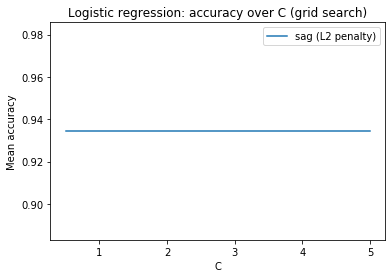

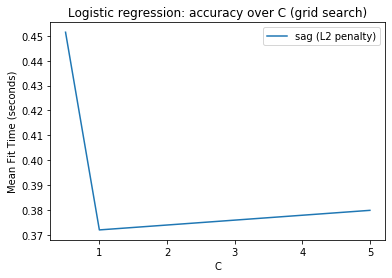

Best estimator (sag solver, L2 penalty): {'C': 0.5, 'max_iter': 1000, 'solver': 'saga'}
(172,)
<class 'numpy.ndarray'>
balanced accuracy score:  0.5


In [39]:
##################################################
### 2.1 Logistic Regression: Biopsy Prediction ###
##################################################

# packages
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

from sklearn.utils import class_weight
# note: use y_train.values (pd.DataFrame) instead of y_train (np.array)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_Biopsy), y_train_Biopsy)
# print(class_weights)
# sag solver, l2 penalty
logistic_reg_CV_1 = GridSearchCV(estimator=LogisticRegression(class_weight=class_weights) , param_grid={'C': [0.5,1, 5], 'solver': ['saga'],'max_iter':[1000]}, cv=5, n_jobs=-1) # 5-fold CV
logistic_reg_CV_1.fit(X_train, y_train_Biopsy)

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_time.png")
plt.show()
print("Best estimator (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_params_))

from sklearn.metrics import balanced_accuracy_score
y_pred = logistic_reg_CV_1.predict(X_test)
print(y_pred.shape)
print(type(y_pred))

#>>> y_pred = [0, 1, 0, 0, 0, 1]
print("balanced accuracy score: ",balanced_accuracy_score(y_test_Biopsy, y_pred))

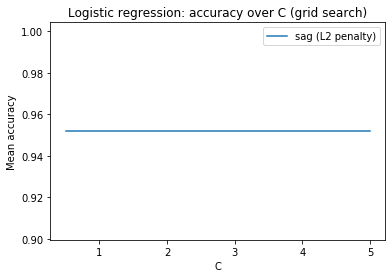

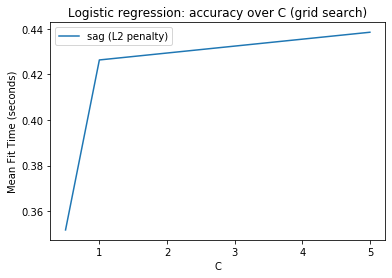

Best estimator (sag solver, L2 penalty): {'C': 0.5, 'max_iter': 1000, 'solver': 'saga'}
(172,)
<class 'numpy.ndarray'>
balanced accuracy score:  0.5


In [40]:
######################################################
### 2.2 Logistic Regression: Hinselmann Prediction ###
######################################################

# packages
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

from sklearn.utils import class_weight
# note: use y_train.values (pd.DataFrame) instead of y_train (np.array)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_Biopsy), y_train_Biopsy)
# print(class_weights)
# sag solver, l2 penalty
logistic_reg_CV_1 = GridSearchCV(estimator=LogisticRegression(class_weight=class_weights) , param_grid={'C': [0.5,1, 5], 'solver': ['saga'],'max_iter':[1000]}, cv=5, n_jobs=-1) # 5-fold CV
logistic_reg_CV_1.fit(X_train, y_train_Hinselmann)

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_time.png")
plt.show()
print("Best estimator (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_params_))

from sklearn.metrics import balanced_accuracy_score
y_pred = logistic_reg_CV_1.predict(X_test)
print(y_pred.shape)
print(type(y_pred))

#>>> y_pred = [0, 1, 0, 0, 0, 1]
print("balanced accuracy score: ",balanced_accuracy_score(y_test_Hinselmann, y_pred))

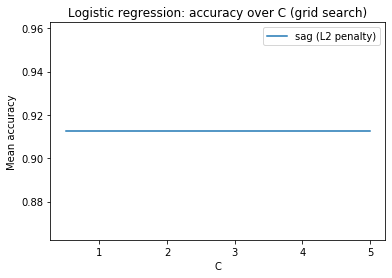

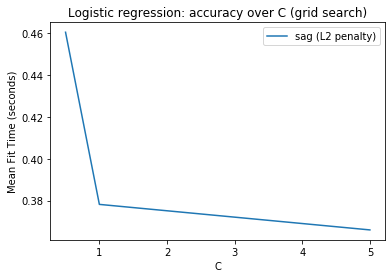

Best estimator (sag solver, L2 penalty): {'C': 0.5, 'max_iter': 1000, 'solver': 'saga'}
(172,)
<class 'numpy.ndarray'>
balanced accuracy score:  0.5


In [41]:
####################################################
### 2.3 Logistic Regression: Schiller Prediction ###
####################################################

# packages
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

from sklearn.utils import class_weight
# note: use y_train.values (pd.DataFrame) instead of y_train (np.array)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_Biopsy), y_train_Biopsy)
# print(class_weights)
# sag solver, l2 penalty
logistic_reg_CV_1 = GridSearchCV(estimator=LogisticRegression(class_weight=class_weights) , param_grid={'C': [0.5,1, 5], 'solver': ['saga'],'max_iter':[1000]}, cv=5, n_jobs=-1) # 5-fold CV
logistic_reg_CV_1.fit(X_train, y_train_Schiller)

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_time.png")
plt.show()
print("Best estimator (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_params_))

from sklearn.metrics import balanced_accuracy_score
y_pred = logistic_reg_CV_1.predict(X_test)
print(y_pred.shape)
print(type(y_pred))

#>>> y_pred = [0, 1, 0, 0, 0, 1]
print("balanced accuracy score: ",balanced_accuracy_score(y_test_Schiller, y_pred))

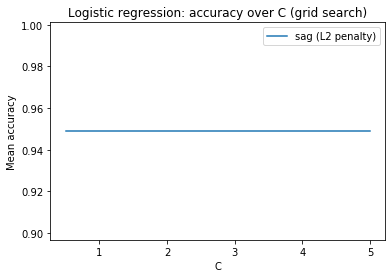

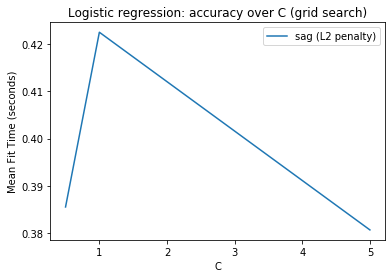

Best estimator (sag solver, L2 penalty): {'C': 0.5, 'max_iter': 1000, 'solver': 'saga'}
(172,)
<class 'numpy.ndarray'>
balanced accuracy score:  0.5


In [42]:
####################################################
### 2.4 Logistic Regression: Citology Prediction ###
####################################################

# packages
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

from sklearn.utils import class_weight
# note: use y_train.values (pd.DataFrame) instead of y_train (np.array)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_Biopsy), y_train_Biopsy)
# print(class_weights)
# sag solver, l2 penalty
logistic_reg_CV_1 = GridSearchCV(estimator=LogisticRegression(class_weight=class_weights) , param_grid={'C': [0.5,1, 5], 'solver': ['saga'],'max_iter':[1000]}, cv=5, n_jobs=-1) # 5-fold CV
logistic_reg_CV_1.fit(X_train, y_train_Citology)

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_accuracy.png")
plt.show()

plt.plot(list(logistic_reg_CV_1.cv_results_.get('param_C')), logistic_reg_CV_1.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title("Logistic regression: accuracy over C (grid search)")
plt.legend()
plt.savefig("logistic_regression/log_reg_models_time.png")
plt.show()
print("Best estimator (sag solver, L2 penalty): " + str(logistic_reg_CV_1.best_params_))

from sklearn.metrics import balanced_accuracy_score
y_pred = logistic_reg_CV_1.predict(X_test)
print(y_pred.shape)
print(type(y_pred))

#>>> y_pred = [0, 1, 0, 0, 0, 1]
print("balanced accuracy score: ",balanced_accuracy_score(y_test_Citology, y_pred))